# **`Dimensionality Reduction, Feature Extraction and Manifold Learning`**

## `Principal Component Analysis (PCA)`

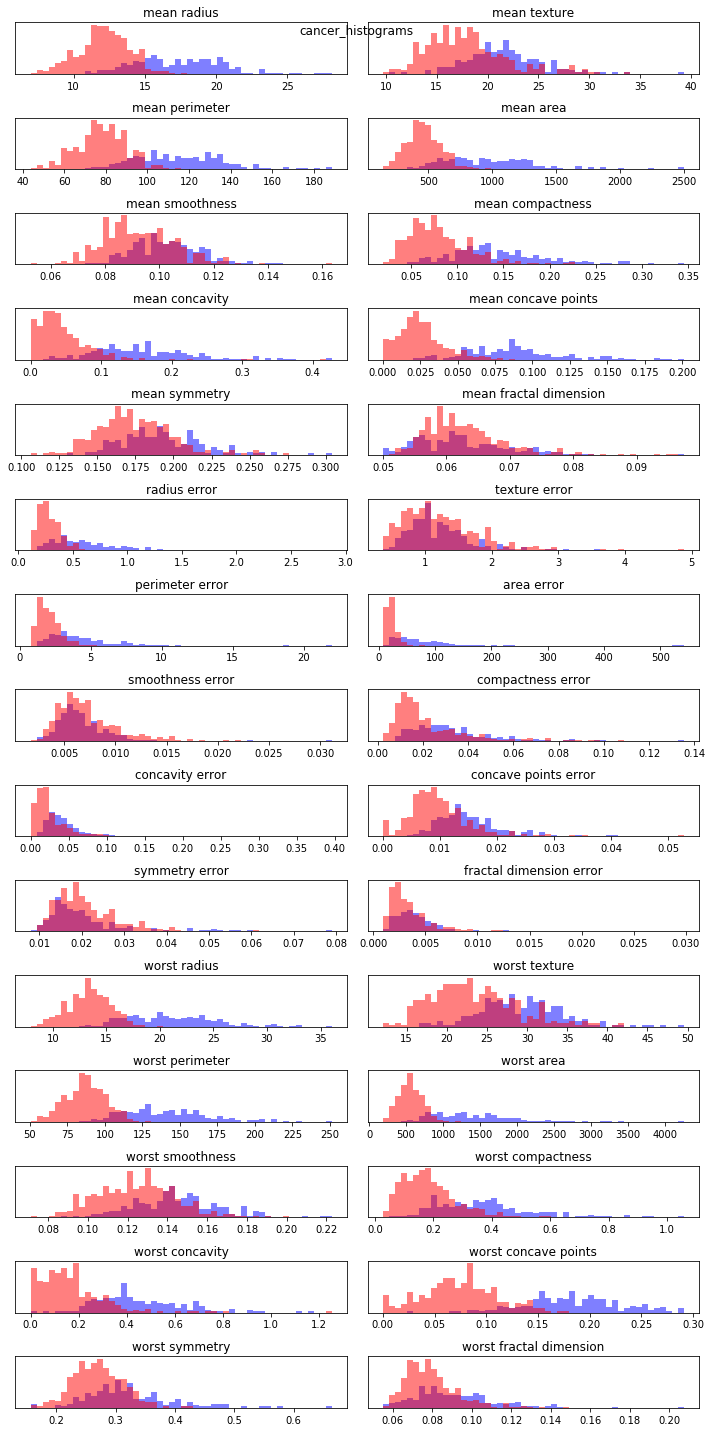

In [1]:
#using breast data sets
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()

fig, axes = plt.subplots(15,2, figsize=(10,20))

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='b', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='r', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    fig.tight_layout()
    plt.suptitle("cancer_histograms")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scale = StandardScaler()
scale.fit(cancer.data)
X_scaled = scale.transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print('Original Data Shape', cancer.data.shape)
print('PCA Data Shape', X_pca.shape)

Original Data Shape (569, 30)
PCA Data Shape (569, 2)


Text(0, 0.5, 'Second principal component')

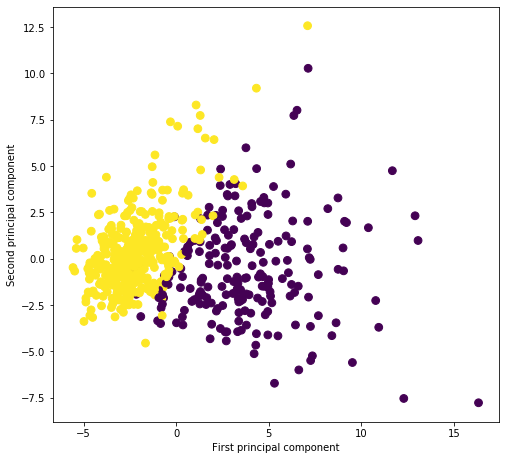

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target, s=60)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

### `for feature extraction`

In [ ]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
plt.suptitle("some_faces")

## `Manifold learning with t-SNE`

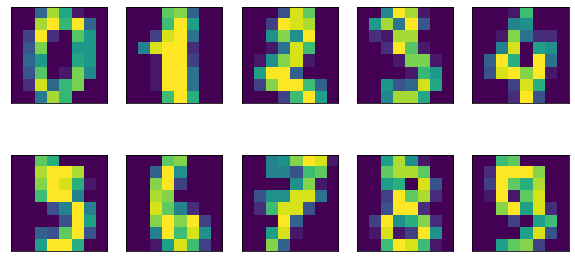

In [7]:
from sklearn.datasets import load_digits

digit = load_digits()

fig, axes = plt.subplots(2,5, figsize=(10,5), subplot_kw={'xticks':(), 'yticks': ()})

for ax, img in zip(axes.ravel(), digit.images):
    ax.imshow(img)
    



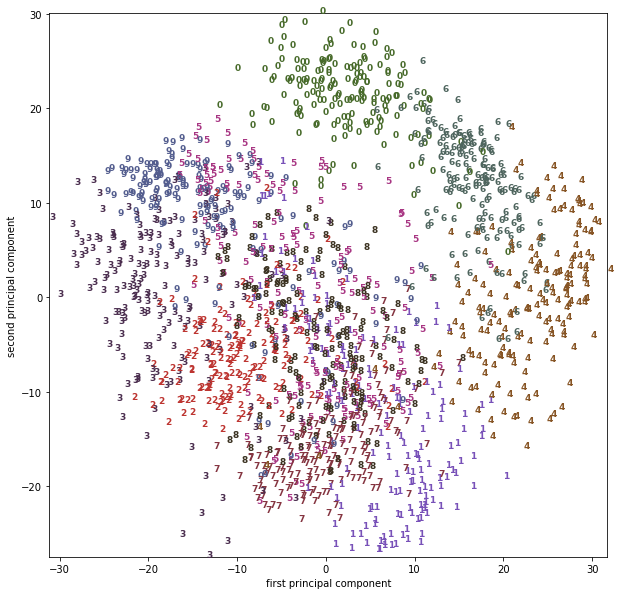

In [10]:
# Building PCA
pca = PCA(n_components=2)
pca.fit(digit.data)

#transform data
digit_pca = pca.transform(digit.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digit_pca[:, 0].min(), digit_pca[:, 0].max())
plt.ylim(digit_pca[:, 1].min(), digit_pca[:, 1].max())
for i in range(len(digit.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digit_pca[i, 0], digit_pca[i, 1], str(digit.target[i]),
             color = colors[digit.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel("first principal component")
    plt.ylabel("second principal component")

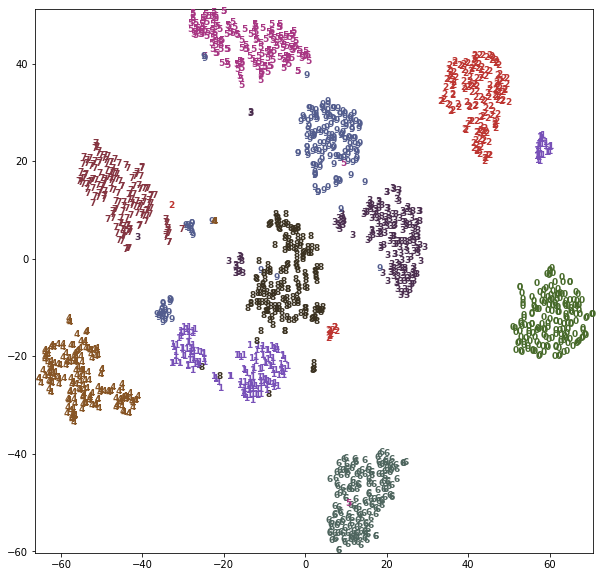

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method:
digits_tsne = tsne.fit_transform(digit.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digit.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digit.target[i]),
             color = colors[digit.target[i]], fontdict={'weight': 'bold', 'size': 9})

## `Agglomerative Clustering`

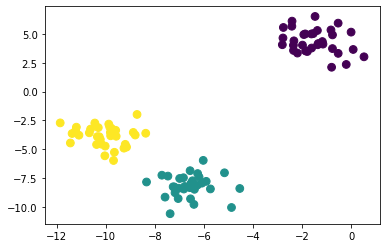

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs, make_moons

X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=assignment, s=60)

## `DBSCAN`

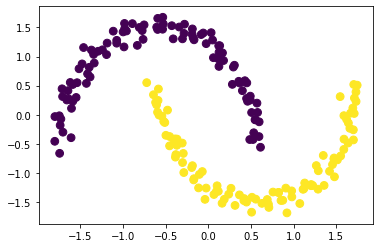

In [20]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

#Rescaling

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

#modelling
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
cluster = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=cluster, s=60);